💰 Performing Financial Analytics...
🔍 Downloading market data (Market Research)...


/tmp/ipython-input-3479328544.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed

Downloaded data shape: (1006, 5)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538536,72.598914,71.292326,71.545912,135480400
2020-01-03,71.833298,72.594063,71.608692,71.765674,146322800
2020-01-06,72.405670,72.444313,70.703005,70.954181,118387200
2020-01-07,72.065132,72.671325,71.845354,72.415322,108872000
2020-01-08,73.224411,73.526303,71.768086,71.768086,132079200


📊 Performing Financial Analytics...
📈 Performing Trend Analysis...
Trend Analysis Results:
Trend
Upward      616
Neutral     199
Downward    191
Name: count, dtype: int64


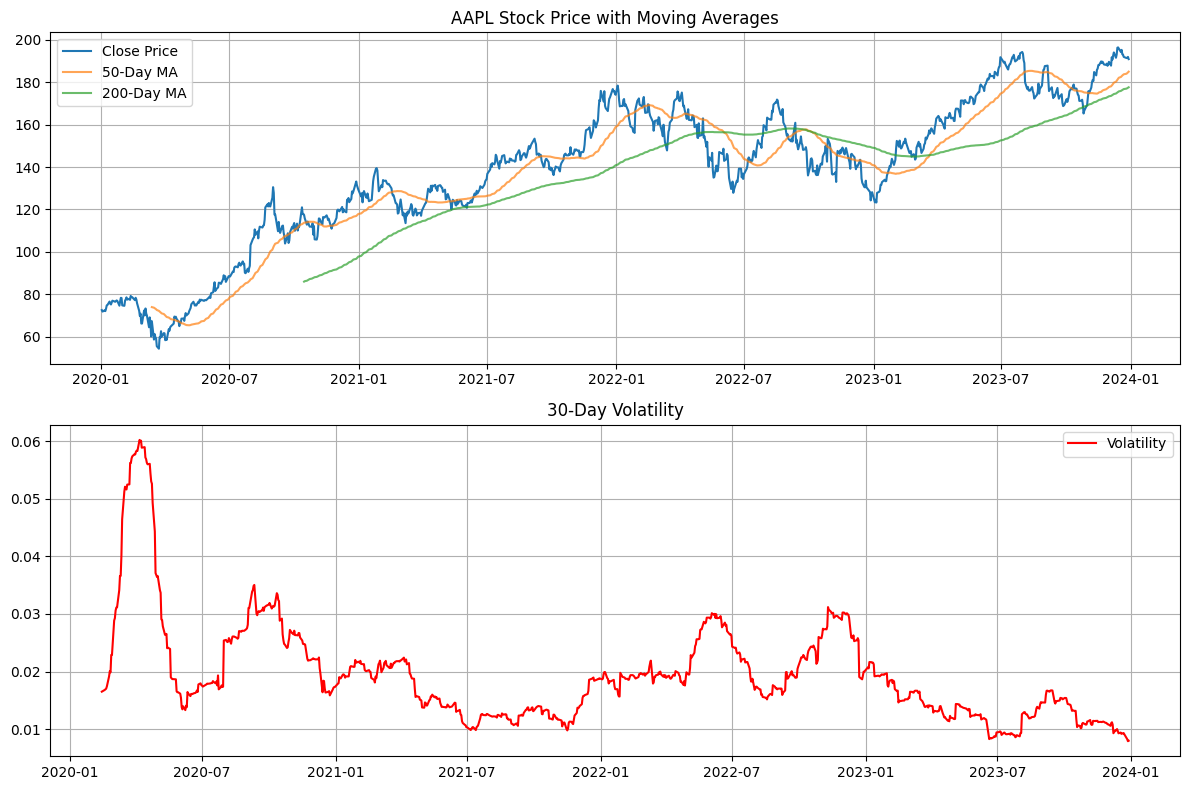

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Financial Analytics Complete! Excel file downloaded.


In [1]:
!pip install yfinance pandas numpy matplotlib plotly openpyxl

# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import files

print(" Performing Financial Analytics...")

# 1. Market Research: Downloading financial data
print(" Downloading market data (Market Research)...")
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2023-12-31")

print("Downloaded data shape:", data.shape)
display(data.head())

# 2. Financial Analytics: Calculate key metrics
print(" Performing Financial Analytics...")
data['Daily Return'] = data['Close'].pct_change()
data['Volatility'] = data['Daily Return'].rolling(window=30).std()
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()

# 3. Trend Analysis: Identify trends using moving averages
print(" Performing Trend Analysis...")
data['Trend'] = 'Neutral'
data.loc[data['MA_50'] > data['MA_200'], 'Trend'] = 'Upward'
data.loc[data['MA_50'] < data['MA_200'], 'Trend'] = 'Downward'

# Display trend analysis results
trend_counts = data['Trend'].value_counts()
print("Trend Analysis Results:")
print(trend_counts)

# Plot financial data
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA_50'], label='50-Day MA', alpha=0.7)
plt.plot(data['MA_200'], label='200-Day MA', alpha=0.7)
plt.title('AAPL Stock Price with Moving Averages')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(data['Volatility'], label='Volatility', color='red')
plt.title('30-Day Volatility')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 4. Save the analyzed data
financial_metrics = data[['Close', 'Daily Return', 'Volatility', 'MA_50', 'MA_200', 'Trend']].tail(100)

# Save to Excel
with pd.ExcelWriter('financial_analysis_report.xlsx', engine='openpyxl') as writer:
    financial_metrics.to_excel(writer, sheet_name='AAPL Analysis')
    pd.DataFrame(trend_counts).to_excel(writer, sheet_name='Trend Analysis')

# Download the Excel file
files.download('financial_analysis_report.xlsx')

print(" Financial Analytics Complete! Excel file downloaded.")